In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import kr_helper_funcs as kr
from sklearn.preprocessing import MinMaxScaler
import kr_helper_funcs as kr
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from lime import lime_tabular
import shap
import tensorflow_addons as tfa
import os
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Flowers Model

In [2]:
name = 'flowers'
fileName = "{}-values.csv".format(name)


res = pd.read_csv(fileName, low_memory=False)

save_path = os.path.join('C:/Users/dan39/OneDrive/Desktop/DissertationLatex/DissertationLatex/images/', name)
                         
def save(img_name):
    plt.savefig(os.path.join(save_path, img_name))

In [3]:
pd.options.display.max_columns = None
res

,original_class,original_probability,new_probability,confidence_diff,class_change,new_class,explainer,strategy,sigma,time,num_features
0,0,0.880867,0.235413,0.645454,True,3,shap,top,0.1,10.805395,1
1,0,0.880867,0.102166,0.778701,True,3,shap,top,0.2,0.183658,1
2,0,0.880867,0.059884,0.820984,True,2,shap,top,0.3,0.178439,1
3,0,0.880867,0.099489,0.781378,True,4,shap,top,0.5,0.183589,1
4,0,0.880867,0.073221,0.807646,True,4,shap,top,0.8,0.177763,1
...,...,...,...,...,...,...,...,...,...,...,...
531995,4,0.983523,0.979559,0.003964,False,4,random,rest,0.1,0.191019,20
531996,4,0.983523,0.981220,0.002303,False,4,random,rest,0.2,0.187815,20
531997,4,0.983523,0.992610,-0.009087,False,4,random,rest,0.3,0.182820,20
531998,4,0.983523,0.998435,-0.014912,False,4,random,rest,0.5,0.191152,20


In [4]:
res[(res['strategy'] == 'top') & (res['explainer'] == 'grad') & (res['num_features'] == 5)]

,original_class,original_probability,new_probability,confidence_diff,class_change,new_class,explainer,strategy,sigma,time,num_features
266040,0,0.880867,0.305350,0.575517,True,3,grad,top,0.1,0.191502,5
266041,0,0.880867,0.054269,0.826598,True,3,grad,top,0.2,0.201546,5
266042,0,0.880867,0.006823,0.874044,True,4,grad,top,0.3,0.198736,5
266043,0,0.880867,0.001381,0.879487,True,4,grad,top,0.5,0.202321,5
266044,0,0.880867,0.001425,0.879442,True,4,grad,top,0.8,0.201071,5
...,...,...,...,...,...,...,...,...,...,...,...
398840,4,0.983523,0.970526,0.012997,False,4,grad,top,0.1,0.198375,5
398841,4,0.983523,0.845196,0.138327,False,4,grad,top,0.2,0.188396,5
398842,4,0.983523,0.672288,0.311236,False,4,grad,top,0.3,0.186845,5
398843,4,0.983523,0.565987,0.417536,False,4,grad,top,0.5,0.195101,5


## G1 Number of images from each flower class

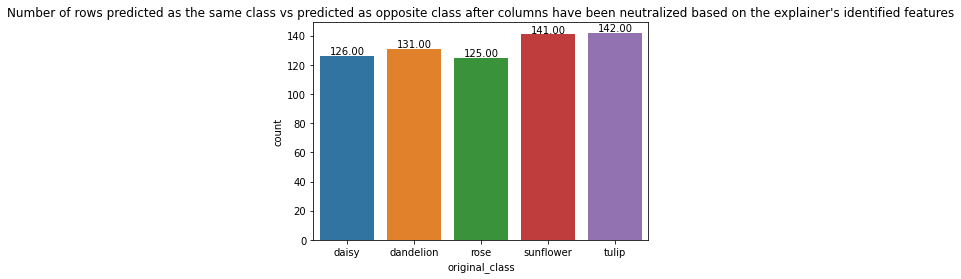

In [5]:
ax = sns.countplot(x="original_class",data=res[(res['strategy'] == 'top') & (res['explainer'] == 'shap') & (res['num_features'] == 5) & (res['sigma'] == 0.5)] ) 
ax.set(xticklabels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])
plt.title("Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
# save("class distribution")

## G2 All class changes (per class) across all explainers that occured while using strategy top

Text(0.5, 1.0, "Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

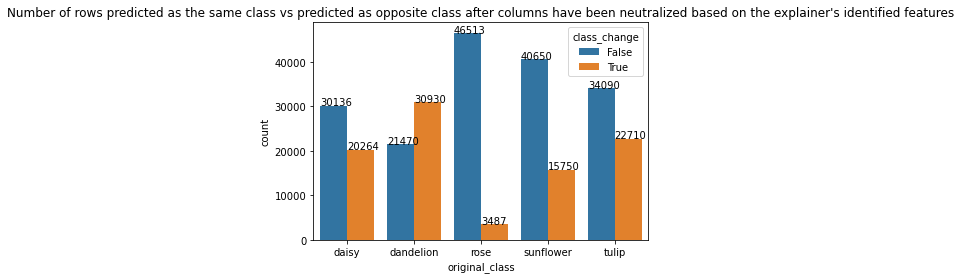

In [6]:
ax = sns.countplot(x="original_class",data=res[ (res['strategy'] == 'top')  ], hue = 'class_change')
ax.set(xticklabels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+10))
plt.title("Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

In [7]:
# plt.figure(figsize=(10,4))
# ax = sns.barplot(x= "original_class", y= "class_change",  data=res[(res['strategy'] == 'top') ], estimator=lambda x: sum(x==False)*100.0/len(x))
# ax.set(xticklabels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])

# index = 0
# for i in ax.patches:
#     total = res[(res['strategy'] == 'top')  &  (res['original_class'] == index)]["class_change"].count()
#     index = index + 1
#     # get_x pulls left or right; get_height pushes up or down
#     ax.text(i.get_x()+0.0, i.get_height() +1, \
#             str(round((i.get_height()), 2))+'%', fontsize=14)

13100


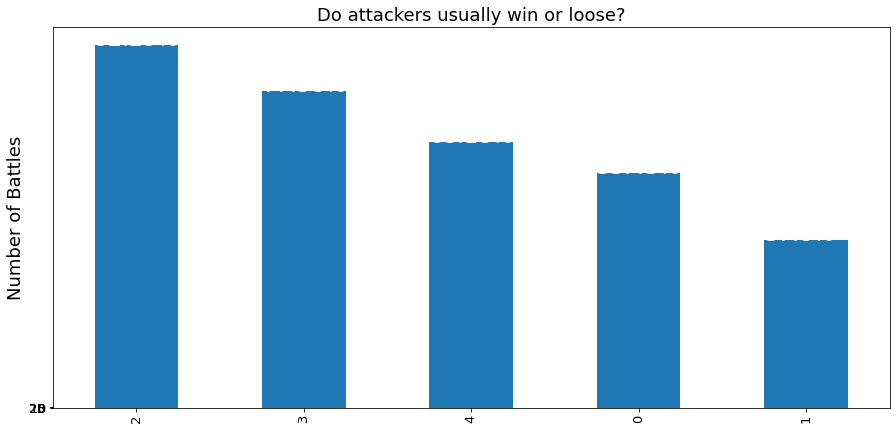

In [8]:
ax = res[(res['strategy'] == 'top') & (res["class_change"] == False) ]['original_class'].value_counts().plot(kind='bar', figsize=(15,7),
                                                   fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Do attackers usually win or loose?", fontsize=18)
ax.set_ylabel("Number of Battles", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20, 25])

# create a list to collect the plt.patches data
total = res[(res['strategy'] == 'top') & (res['explainer'] == 'random') &  (res['original_class'] == 1)]["class_change"].count()
print(total)
# find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_height())

# set individual bar lables using above list
# total = sum(totals)

# set individual bar lables using above list
index = 0
for i in ax.patches:
    total = res[(res['strategy'] == 'top')  &  (res['original_class'] == index)]["class_change"].count()
    index = index + 1
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.0, i.get_height()-130, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')

In [9]:
res[(res['strategy'] == 'top') & (res['explainer'] == 'grad') &  (res['original_class'] == 3)].groupby("num_features").sum()

,original_class,original_probability,new_probability,confidence_diff,class_change,new_class,sigma,time
num_features,,,,,,,,
1,2115,678.405789,419.845397,258.560391,269.0,2058,267.9,146.149751
2,2115,678.405789,430.863134,247.542655,261.0,2078,267.9,135.941181
3,2115,678.405789,443.345604,235.060185,239.0,2095,267.9,136.667955
4,2115,678.405789,453.369841,225.035948,230.0,2100,267.9,136.446939
5,2115,678.405789,463.009722,215.396067,223.0,2096,267.9,135.954772
6,2115,678.405789,470.450006,207.955782,220.0,2113,267.9,135.847255
7,2115,678.405789,476.644850,201.760938,217.0,2108,267.9,135.413894
8,2115,678.405789,489.644672,188.761117,196.0,2087,267.9,135.247916
9,2115,678.405789,504.441151,173.964638,175.0,2096,267.9,135.252150


## G3 All class changes (per explainer) across both classes that occured while using strategy rest

Text(0.5, 1.0, "Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

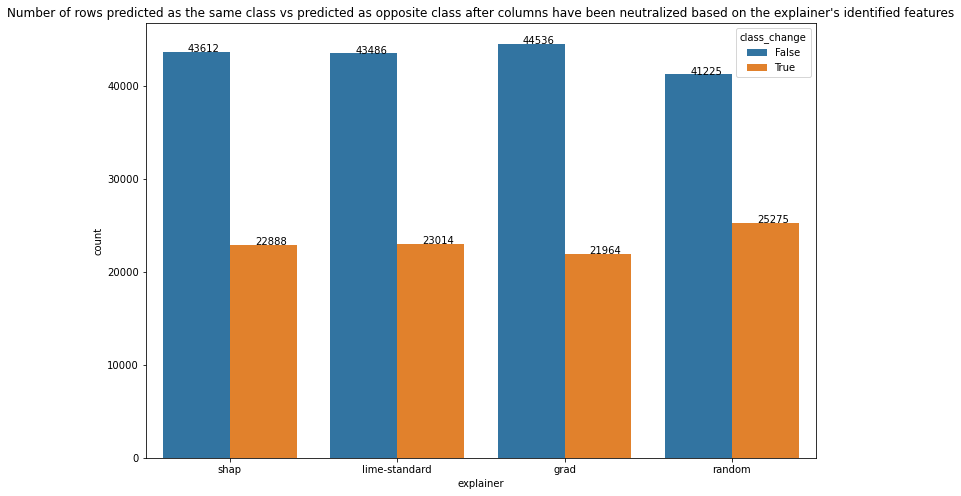

In [10]:
plt.figure(figsize=(12,8))
ax =sns.countplot(x="explainer",data=res[(res['strategy'] == 'top') ], hue = 'class_change')
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.title("Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

Text(0.5, 1.0, "Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

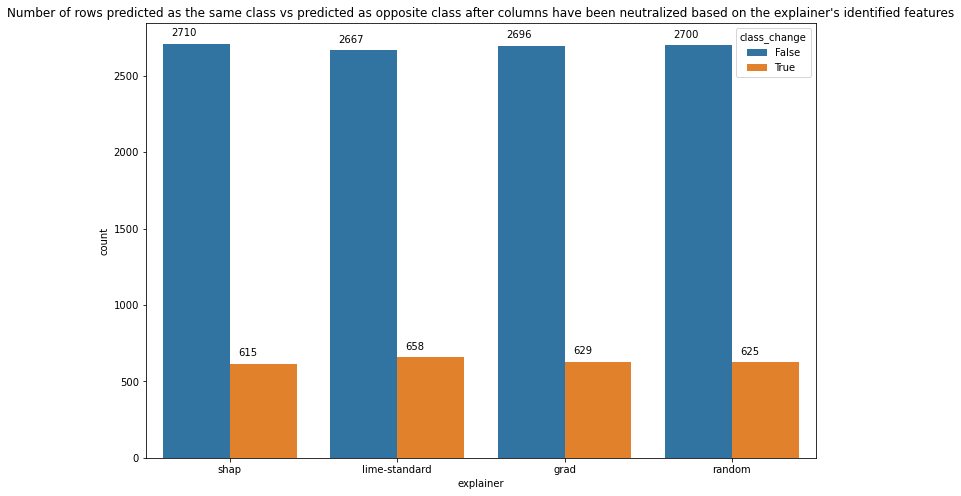

In [11]:
plt.figure(figsize=(12,8))
ax =sns.countplot(x="explainer",data=res[(res['strategy'] == 'rest') & (res['num_features'] == 20) ], hue = 'class_change')
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+50))
plt.title("Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

In [12]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
def t_test(data1, data2):
    # seed the random number generator
    seed(1)
    # generate two independent samples
#     data1 = 5 * randn(100) + 50
#     data2 = 5 * randn(100) + 51
    # compare samples
    stat, p = mannwhitneyu(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

def calculate_p(explainer1, explainer2, strategy, original_class, feature_number):
    data1 = res[ (res['strategy'] == strategy) & (res['explainer'] == explainer1) & (res['num_features'] == feature_number) & (res['original_class'] == original_class)]["confidence_diff"]
    data2 = res[ (res['strategy'] == strategy) & (res['explainer'] == explainer2) & (res['num_features'] == feature_number) & (res['original_class'] == original_class)]["confidence_diff"]
    print("Data1 mean {} Data2 mean {}".format(data1.mean(), data2.mean()))
    t_test(data1, data2)
    
calculate_p("random","shap", "top", original_class= 0, feature_number=20)

Data1 mean 0.36203909718756644 Data2 mean 0.2995565901820404
Statistics=185391.000, p=0.022
Different distribution (reject H0)


Statistics=146.000, p=0.074
Same distribution (fail to reject H0)


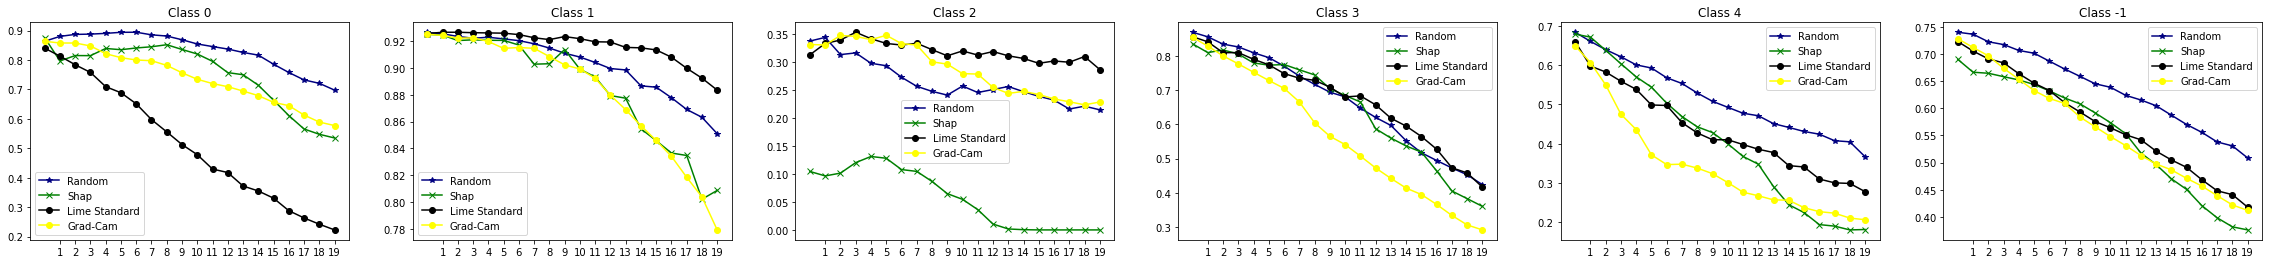

<Figure size 792x288 with 0 Axes>

<Figure size 792x288 with 0 Axes>

<Figure size 792x288 with 0 Axes>

<Figure size 792x288 with 0 Axes>

<Figure size 792x288 with 0 Axes>

<Figure size 792x288 with 0 Axes>

In [13]:
# Same as the graph above but the plot is class specific, in this case for class 1. For class 0, there are not enough datapoints to plot the graph
f, ax = plt.subplots(nrows=1, ncols=6, figsize=(40, 4))

def get_data(explainer, original_class):
    default_data = res[ (res['strategy'] == 'top') & (res['sigma'] == 0.8)]
    if original_class == -1:
        return  default_data[(default_data['explainer'] == explainer) ].groupby("num_features")["confidence_diff"].mean()
    return default_data[(default_data['explainer'] == explainer) & (default_data['original_class'] == original_class)].groupby("num_features")["confidence_diff"].mean()


def get_plot(col, original_class):
    plt.figure(figsize=(11,4))
    no_of_features = list(range(0, len(get_data("grad", original_class)) ))
    ax[col].xaxis.set_ticks(get_data("shap", original_class).keys())
    # ax[0].set_xlim(1, 12)
    ax[col].plot( no_of_features, get_data("random", original_class), color='navy', marker='*', linestyle='-', label='Random')
    ax[col].plot( no_of_features, get_data("shap", original_class), color='green', marker='x', linestyle='-', label='Shap')
#     ax[col].plot( no_of_features, get_data("lime", original_class), color='red', marker='o', linestyle='-', label='Lime')
    ax[col].plot( no_of_features, get_data("lime-standard", original_class), color='black', marker='o', linestyle='-', label='Lime Standard')
    ax[col].plot( no_of_features, get_data("grad", original_class), color='yellow', marker='o', linestyle='-', label='Grad-Cam')
    ax[col].set_title("Class {}".format(original_class))
    ax[col].legend(loc='best')
    # ax[0].set(xticklabels=list(range(11)))
    return ax

get_plot(0, 0)
get_plot(1, 1)
get_plot(2, 2)
get_plot(3, 3)
get_plot(4, 4)
get_plot(5, -1)



data_shap = list(get_data("grad", 2).values)
# data_shap.extend(list(get_data("grad", 2).values))

data_lime = list(get_data("random", 2).values)
# data_lime.extend(list(get_data("random", 2).values))
t_test(data_shap, data_lime)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


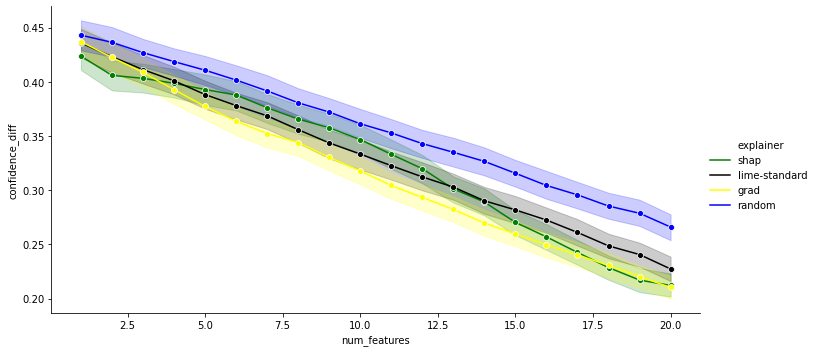

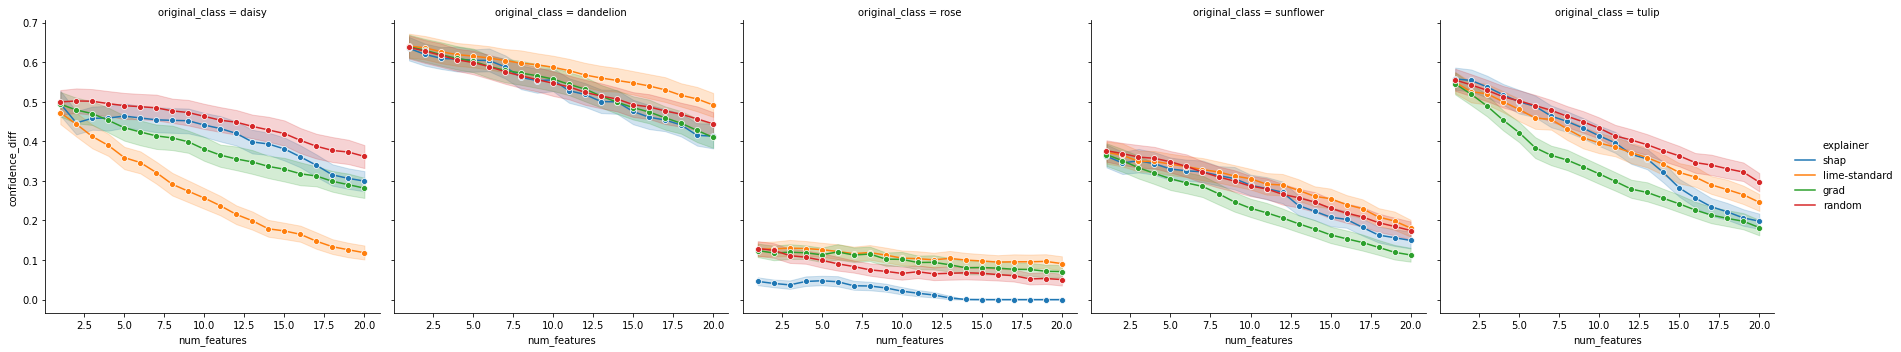

In [14]:
data = res[ (res['strategy'] == 'top')]

# f, ax = plt.figure(figsize=(11,4))
# sns.set_style("ticks")
palette = {"shap":"green", "lime":"red", "grad":"yellow", "lime-standard":"black", "random":"blue"}
g = sns.relplot(x='num_features', y="confidence_diff", hue ='explainer', marker="o", kind="line", dashes=False, markers=True, data = data, height=5, aspect=2, palette = palette);
# g.xaxis.set_ticks([str(x) for x in list(range(0,20))])
labels = [str(x) for x in list(range(0,20))]
# g.set(xticklabels=[str(x) for x in list(range(0,20))])
# g.set_xticklabels(labels)
# plt.tight_layout()


data['original_class'] = data['original_class'].apply(lambda x: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'][int(x)] )
sns.relplot(x='num_features', y="confidence_diff", hue ='explainer',  col="original_class", marker="o", kind="line", dashes=False, markers=True, data = data);

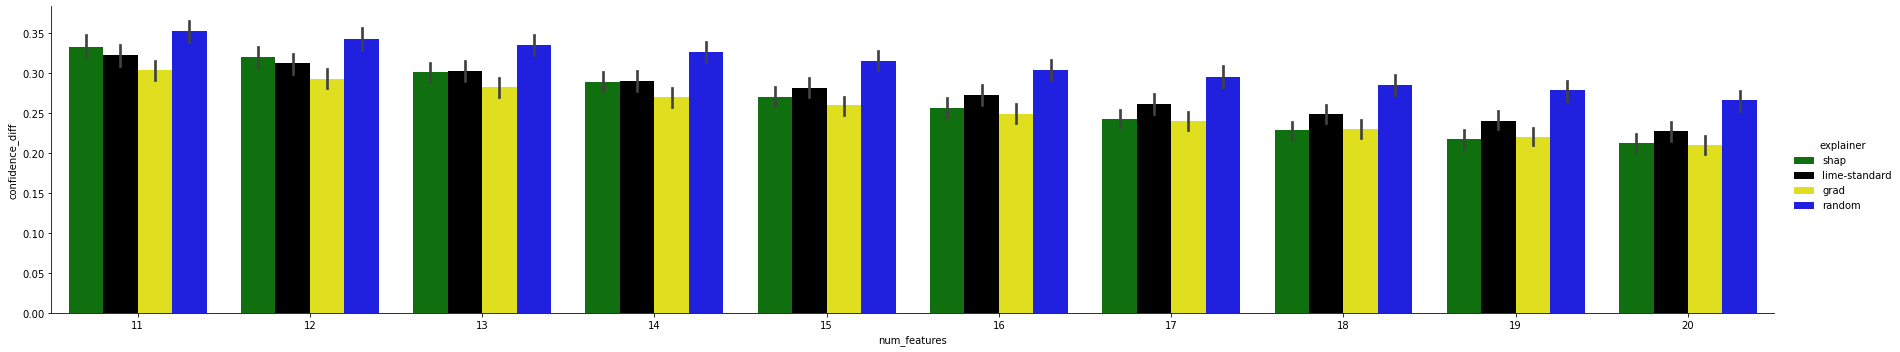

In [19]:
data = res[ (res['strategy'] == 'top') & (res['num_features'] > 10)]
sns.catplot(x="num_features", y="confidence_diff", hue="explainer", kind="bar", data=data, height=5, aspect=5,  palette = palette);

In [16]:
data['original_class'].apply(lambda x: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'][x])

100       daisy
101       daisy
102       daisy
103       daisy
104       daisy
          ...  
531990    tulip
531991    tulip
531992    tulip
531993    tulip
531994    tulip
Name: original_class, Length: 133000, dtype: object

In [17]:
default_data = res[ (res['strategy'] == 'top')]
default_data[(default_data['explainer'] == "grad") & (default_data['original_class'] == 1)]

,original_class,original_probability,new_probability,confidence_diff,class_change,new_class,explainer,strategy,sigma,time,num_features
291200,1,0.988329,0.733744,0.254585,False,1,grad,top,0.1,0.275867,1
291201,1,0.988329,0.127831,0.860498,True,3,grad,top,0.2,0.200003,1
291202,1,0.988329,0.014895,0.973434,True,2,grad,top,0.3,0.198605,1
291203,1,0.988329,0.018779,0.969551,True,2,grad,top,0.5,0.191538,1
291204,1,0.988329,0.010843,0.977487,True,2,grad,top,0.8,0.191189,1
...,...,...,...,...,...,...,...,...,...,...,...
317390,1,0.927250,0.941846,-0.014595,False,1,grad,top,0.1,0.187913,20
317391,1,0.927250,0.638730,0.288520,False,1,grad,top,0.2,0.193132,20
317392,1,0.927250,0.301331,0.625919,False,1,grad,top,0.3,0.189960,20
317393,1,0.927250,0.047118,0.880132,True,2,grad,top,0.5,0.186348,20


In [18]:
res[]

SyntaxError: invalid syntax (<ipython-input-18-1d7590274555>, line 1)